In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("C:/Users/USER/Downloads/s1_modified_labelled.csv")

In [5]:
df.head()

,x,y,Class
0,844536,424646,0
1,870801,476330,0
2,878184,487392,0
3,846693,429031,0
4,777811,751059,0


In [6]:
x=df.iloc[:,0:2]

In [7]:
x.head()

,x,y
0,844536,424646
1,870801,476330
2,878184,487392
3,846693,429031
4,777811,751059


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)

In [13]:
scaled_features

array([[ 1.20213074, -0.51212622],
       [ 1.31602212, -0.23187887],
       [ 1.34803659, -0.17189713],
       [ 1.21148401, -0.48834933],
       [ 0.91279504,  1.25779058],
       [ 1.11296894,  1.11662582],
       [ 1.33492379,  0.97495136],
       [ 1.13126788,  1.20907101],
       [ 1.01297088,  1.24842623],
       [ 1.14415086,  1.43306176],
       [ 0.97874059,  1.33261864],
       [ 1.05439933,  1.0159875 ],
       [ 1.02436219,  1.27803212],
       [ 1.2026771 ,  0.73603295],
       [ 1.02619208,  1.15026049],
       [ 1.1090273 ,  1.16414706],
       [ 1.10508566,  1.15605153],
       [ 1.05839735,  1.10899661],
       [ 0.92200955,  1.38433676],
       [ 1.2465035 ,  1.05652479],
       [ 1.02400228,  1.17534958],
       [ 0.96873689,  1.22973006],
       [ 1.07688274,  1.16221671],
       [ 1.18805096,  0.98892468],
       [ 1.14800577,  1.25926003],
       [ 0.94844328,  0.98866983],
       [ 1.11670245,  1.00802753],
       [ 1.15161353,  1.42125736],
       [ 1.08733742,

In [15]:
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


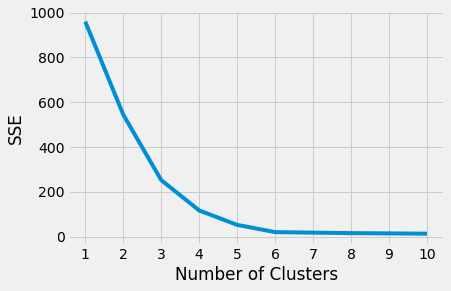

In [17]:
 import matplotlib.pyplot as plt
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [54]:
#Choosing 6 as db scan givving 6 as number of clusters
from sklearn.cluster import KMeans
kmeans = KMeans(init="random",n_clusters=6,n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=6, random_state=42)

In [18]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.2, min_samples=5).fit(scaled_features)

In [19]:
df['Clusters'] = clustering.labels_

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

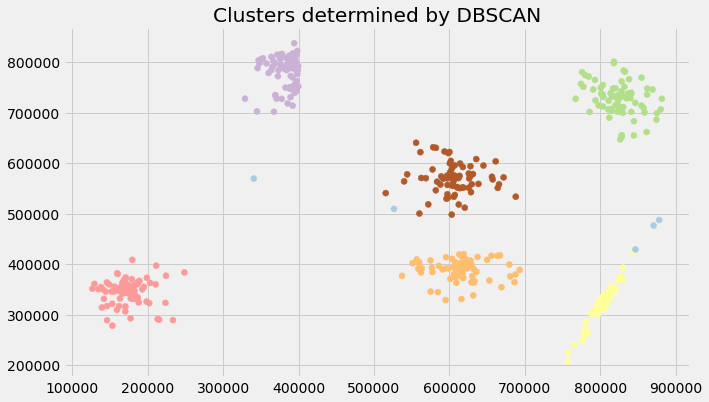

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'],c=df['Clusters'], cmap='Paired')
plt.title("Clusters determined by DBSCAN")

In [20]:
df.head()

,x,y,Class,Clusters
0,844536,424646,0,4
1,870801,476330,0,-1
2,878184,487392,0,-1
3,846693,429031,0,-1
4,777811,751059,0,0


In [22]:
str(clustering)

'DBSCAN(eps=0.2)'

In [25]:
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 5


In [47]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
model.fit(scaled_features)
labels_c = model.labels_
df['agg_clusters_complete']=labels_c

In [48]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(scaled_features)
labels_s = model.labels_
df['agg_clusters_single']=labels_s

In [49]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
model.fit(scaled_features)
labels_w = model.labels_
df['agg_clusters_ward']=labels_w

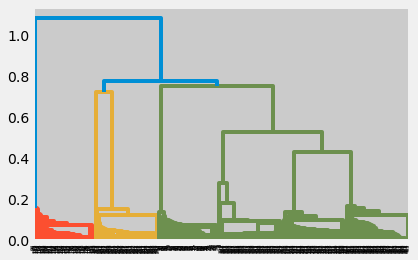

In [38]:
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='single'))

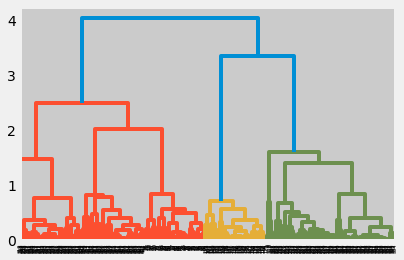

In [39]:
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='complete'))

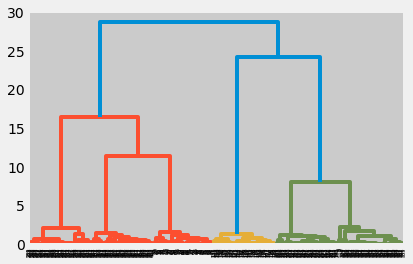

In [40]:
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))

Text(0.5, 1.0, 'Clusters determined by agglomerative clustering linkage ward')

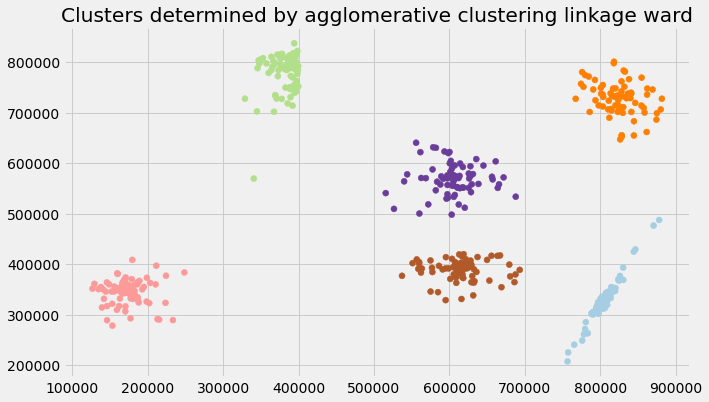

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'],c=df['agg_clusters_ward'], cmap='Paired')
plt.title("Clusters determined by agglomerative clustering linkage ward")

Text(0.5, 1.0, 'Clusters determined by agglomerative clustering linkage single')

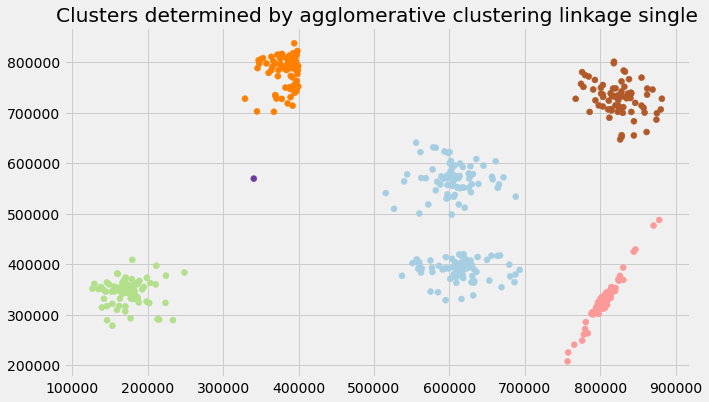

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'],c=df['agg_clusters_single'], cmap='Paired')
plt.title("Clusters determined by agglomerative clustering linkage single")

Text(0.5, 1.0, 'Clusters determined by agglomerative clustering linkage complete')

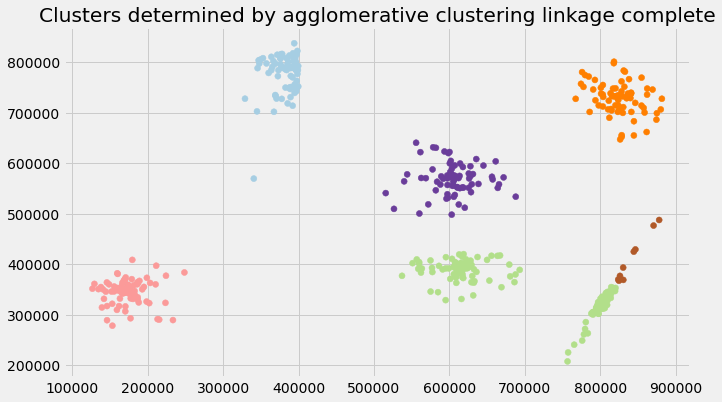

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'],c=df['agg_clusters_complete'], cmap='Paired')
plt.title("Clusters determined by agglomerative clustering linkage complete")

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

In [64]:
kmeans_labels=kmeans.labels_

In [70]:
clustering_labels=df['Clusters']

In [81]:
#Calculating Silhoutee score for each data point
sample_silhouette_values = metrics.silhouette_samples(x, df['Class'])
means_lst = []
for label in range(6):
    means_lst.append(sample_silhouette_values[kmeans_labels == label].mean())
for label in range(6):
     means_lst.append(sample_silhouette_values[clustering_labels == label].mean())
for label in range(6):
     means_lst.append(sample_silhouette_values[labels_c == label].mean())
for label in range(6):
     means_lst.append(sample_silhouette_values[labels_s == label].mean())
for label in range(6):
     means_lst.append(sample_silhouette_values[labels_w == label].mean())

In [83]:
#Calculating Silhoutee score for each cluster
sample_silhouette_values = metrics.silhouette_samples(x, df['Class'])
means_lst_db = []
means_lst_kmeans=[]
means_lst_complete=[]
means_lst_single=[]
means_lst_ward=[]
for label in range(6):
    means_lst_kmeans.append(sample_silhouette_values[kmeans_labels == label].mean())
for label in range(6):
     means_lst_db.append(sample_silhouette_values[clustering_labels == label].mean())
for label in range(6):
     means_lst_complete.append(sample_silhouette_values[labels_c == label].mean())
for label in range(6):
     means_lst_single.append(sample_silhouette_values[labels_s == label].mean())
for label in range(6):
     means_lst_ward.append(sample_silhouette_values[labels_w == label].mean())

In [84]:
 means_lst_kmeans

[0.7736053349227885,
 0.7076408978575455,
 0.7366250025964898,
 0.8576621890387358,
 0.77656320298295,
 0.9057417786159163]

In [85]:
means_lst_db

[0.7736053349227885,
 0.9057417786159163,
 0.7366250025964898,
 0.8576621890387358,
 0.8192418287498475,
 0.7192044760378103]

In [86]:
 means_lst_complete

[0.8492854989329764,
 0.7895959821099514,
 0.9057417786159163,
 0.7736053349227885,
 0.7141423218235399,
 0.19710355902716994]

In [87]:
 means_lst_single

[0.7253836622100149,
 0.9057417786159163,
 0.77656320298295,
 0.8576621890387358,
 0.18752698057800088,
 0.7736053349227885]

In [80]:
 means_lst_ward

[0.77656320298295,
 0.8492854989329764,
 0.9057417786159163,
 0.7736053349227885,
 0.7141423218235399,
 0.7366250025964898]

In [88]:
#Question 6
sum(means_lst)/len(means_lst)

0.7593946593210472

<AxesSubplot:>

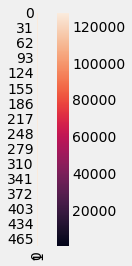

In [89]:
import seaborn as sns
sns.heatmap(np.sort(x),vmax=1,square=True)

In [90]:
x.corr()

,x,y
x,1.000000,0.077272
y,0.077272,1.000000


In [91]:
df.count()

x                        480
y                        480
Class                    480
Clusters                 480
agg_clusters             480
agg_clusters_complete    480
agg_clusters_single      480
agg_clusters_ward        480
dtype: int64

In [94]:
#Q8
print("\nK-Means :-\n")
K_Means_Matrix = np.eye(6)[kmeans.labels_]
print(K_Means_Matrix)

print("\n\nDBSCAN :-\n")
DBSCAN_Matrix = np.eye(6)[clustering.labels_]
print(DBSCAN_Matrix)


K-Means :-

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


DBSCAN :-

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [95]:
#Q9
rand_index_dbs = metrics.adjusted_rand_score(df["Class"],clustering_labels)
print("Rand Index for DBSCAN : ",rand_index_dbs)
rand_index_K_Means = metrics.adjusted_rand_score(df["Class"],kmeans_labels)
print("Rand Index for K-Means : ",rand_index_K_Means)
rand_index_S_Link = metrics.adjusted_rand_score(df["Class"],labels_s)
print("Rand Index for S-Link : ",rand_index_S_Link)
rand_index_C_Link = metrics.adjusted_rand_score(df["Class"],labels_c)
print("Rand Index for C-Link : ",rand_index_C_Link)
rand_index_Ward = metrics.adjusted_rand_score(df["Class"],labels_w)
print("Rand Index for Ward's Method : ",rand_index_Ward)

Rand Index for DBSCAN :  0.9824274646429886
Rand Index for K-Means :  0.9752820336196293
Rand Index for S-Link :  0.8022147429363156
Rand Index for C-Link :  0.809931679984334
Rand Index for Ward's Method :  0.9803009740372722


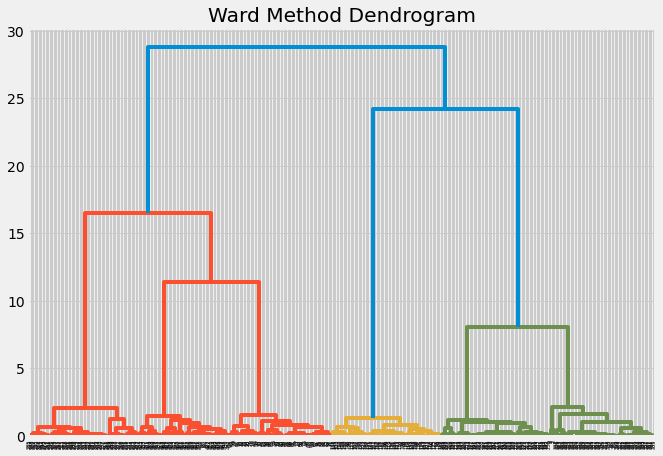

In [97]:
#Plot the dendrogram for p=12
plt.figure(figsize=(10, 7))
plt.title("Ward Method Dendrogram")
dendrogram_ward = sch.dendrogram(sch.linkage(scaled_features, method='ward'), truncate_mode='level', p=12)